In [4]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv("uber-trip-data/uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
df['Day_name'] = pd.to_datetime(df['Date/Time']).dt.day_name()

df.drop(["Date/Time"], axis = 1, inplace=True)

df.head(5)

,Lat,Lon,Base,Day_name
0,40.7690,-73.9549,B02512,Tuesday
1,40.7267,-74.0345,B02512,Tuesday
2,40.7316,-73.9873,B02512,Tuesday
3,40.7588,-73.9776,B02512,Tuesday
4,40.7594,-73.9722,B02512,Tuesday


Base : TLC (Taxi and Limousine Commission) code
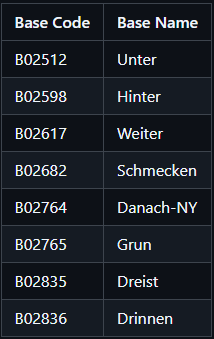

In [7]:
df.shape

(564516, 4)

In [8]:
df.head()

,Lat,Lon,Base,Day_name
0,40.7690,-73.9549,B02512,Tuesday
1,40.7267,-74.0345,B02512,Tuesday
2,40.7316,-73.9873,B02512,Tuesday
3,40.7588,-73.9776,B02512,Tuesday
4,40.7594,-73.9722,B02512,Tuesday


# Preprocessing


In [9]:
df.shape

(564516, 4)

In [10]:
numeric_features = ["Lat", "Lon"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

In [11]:
df_april = df[["Lat", "Lon", "Day_name"]]

In [12]:
print("Preprocessing...")
X = preprocessor.fit_transform(df_april)
print('...Terminé.')
print(X[0:5, :])
print()

Preprocessing...
...Terminé.
[[ 0.8035544   0.43463557]
 [-0.36873718 -1.14392195]
 [-0.23293981 -0.20789287]
 [ 0.52087416 -0.01553096]
 [ 0.53750241  0.09155711]]



In [13]:
X.shape

(564516, 2)

# Reprendre DBSCAN avec toutes les valeurs d'avril 2014 sur les clusters trouvés avant

In [ ]:
# Mon PC ne supporte pas au dessus de 50000
df_sample = df_april.sample(50000)
df_sample.reset_index(drop=True, inplace=True)

In [33]:
print("Preprocessing...")
X = preprocessor.fit_transform(df_sample)
print("...Terminé.")

db = DBSCAN(eps=0.76, min_samples=6, metric="manhattan")

db.fit(X)

df_sample["Cluster_DBSCAN"] = pd.Series(db.labels_)
df_sample.head()

Preprocessing...
...Terminé.


,Lat,Lon,Day_name,Cluster_DBSCAN
0,40.7532,-73.9779,Wednesday,0
1,40.7252,-74.0045,Tuesday,0
2,40.7702,-73.9539,Saturday,0
3,40.7588,-73.9706,Tuesday,0
4,40.7060,-74.0089,Friday,0


In [34]:
fig = px.scatter_map(df_sample[(df_sample.Cluster_DBSCAN != -1)], lat="Lat", lon="Lon", color="Cluster_DBSCAN", zoom=8)
fig.show()